# Linear Regression in TensorFlow

In [136]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

## Set up the data and regression arguments

In [137]:
train_X = np.linspace(-1, 1, 101) # Input data
train_Y = 2 * trX + np.random.randn(*trX.shape) * 0.65 # Ground truth - linear y with some random noise added
n_observations = train_X.shape[0] # number of observations
learning_rate = 0.005 # step size for gradient descent
epochs = 2000 # number of iterations to run

### Use placeholder tensors for the X and Y variables on the graph

In [138]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

### Using a very simple linear model defined by: $f(x_{i}) = w_{0} + w_{1}x_{i}$

In [139]:
def model(X, w):
    return tf.add(tf.mul(X, w[1]), w[0])

### We initialize the weights in a single vector, $w$, with random numbers
### For the cost function we are using gradient descent to minimize over the L2-Norm: 
$cost = 1/n \sum\limits_{i=1}^n (Y - \hat{y})^2 $
#### Curiously, training error improves by taking the average of L2. Does this suggest tensorflow is using stochastic gradient descent?

In [140]:
# w vector will contain all weights for the model
w = tf.Variable([rng.randn(),rng.randn()], name="weights")

# Load our linear model into a variable to be inserted to the graph
y_predicted = model(X, w)

# Cost function to minimize least squared error
cost = tf.reduce_sum(tf.square(Y - y_predicted))/float(n_observations) # use square error for cost function

# The optimizer is fed the cost function and the learning rate
# note: experiment with the adam optimizer here, learning rate is dynamically calculated
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # construct an optimizer to minimize cost

### Start a tf.Session to run the graph
#### First all the placeholder variables are initialized, then the optimizer is run in a loop for the specified number of epochs. The optimizer is fed paired (X, Y) data. After all epochs are run, the model parameters are printed and the trained line is plotted on the page

W: 1.82416
b: 0.0610449
Error: 34.183562845


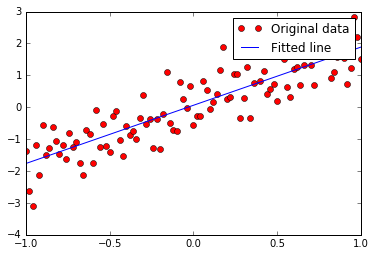

In [141]:
with tf.Session() as sess:
    # Init variables
    tf.initialize_all_variables().run()
    
    # Loop through epochs and optimize
    for i in range(epochs):
        for (x, y) in zip(train_X, train_Y): # Pair up X and Y variables in a list of tuples
            sess.run(optimizer, feed_dict={X: x, Y: y})
    
    # After approx convergence print model parameters
    print("W: " + str(sess.run(w[1])))
    print("b: " + str(sess.run(w[0])))
    print("Error: " + str(sess.run(cost, feed_dict={X: train_X, Y: train_Y}) * (n_observations)))
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, (sess.run(w[1]) * train_X) + sess.run(w[0]), label='Fitted line')
    plt.legend()
    plt.show()